#                                                 Language Classification Model

# Introduction 

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

# Problem statement 

This project aims to identify and classify the text into 11 official South African Languages 

#  Import Libraries 

In [1]:

import numpy as np
from comet_ml import Experiment
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt #  plot graphs
pd.set_option('display.max_rows', None) # show all rows 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
%matplotlib inline


#  Load data 

In [2]:
df_train= pd.read_csv('train_set.csv')
df_test=pd.read_csv('test_set.csv')

# Exploratory Data Analysis 

In this section , data will be explored using data science techninques to see data components and howt it is structured. Analysing the components and structure of the data will help inform how best data can be cleaned for the model to train on it. 

### Check out the data layout 

In [3]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


Training data has two columns namely language ID and text while test has index and text. The text and language ID are categorical values,  while index is a number. 

### Check out the data shape 

In [5]:
df_train.shape

(33000, 2)

In [6]:
df_test.shape

(5682, 2)

As stated before there are two columns and 33000 rows in the train data which is a significant amount. This is good for training my model as models perform better from more data. The test data has less rows and its ok becuse this data is used to test the model's performance

### Check out for missing values and class imbalance 

In [7]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

We are off to a good start, there are no missing values . That means no data will be dropped. 

#### Understanding the Y variable (lang_id column)

In [8]:
# value counts 
df_train['lang_id'].value_counts()

afr    3000
zul    3000
tso    3000
xho    3000
nbl    3000
tsn    3000
ven    3000
nso    3000
sot    3000
eng    3000
ssw    3000
Name: lang_id, dtype: int64

C:\Users\Revolve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lang_id', ylabel='count'>

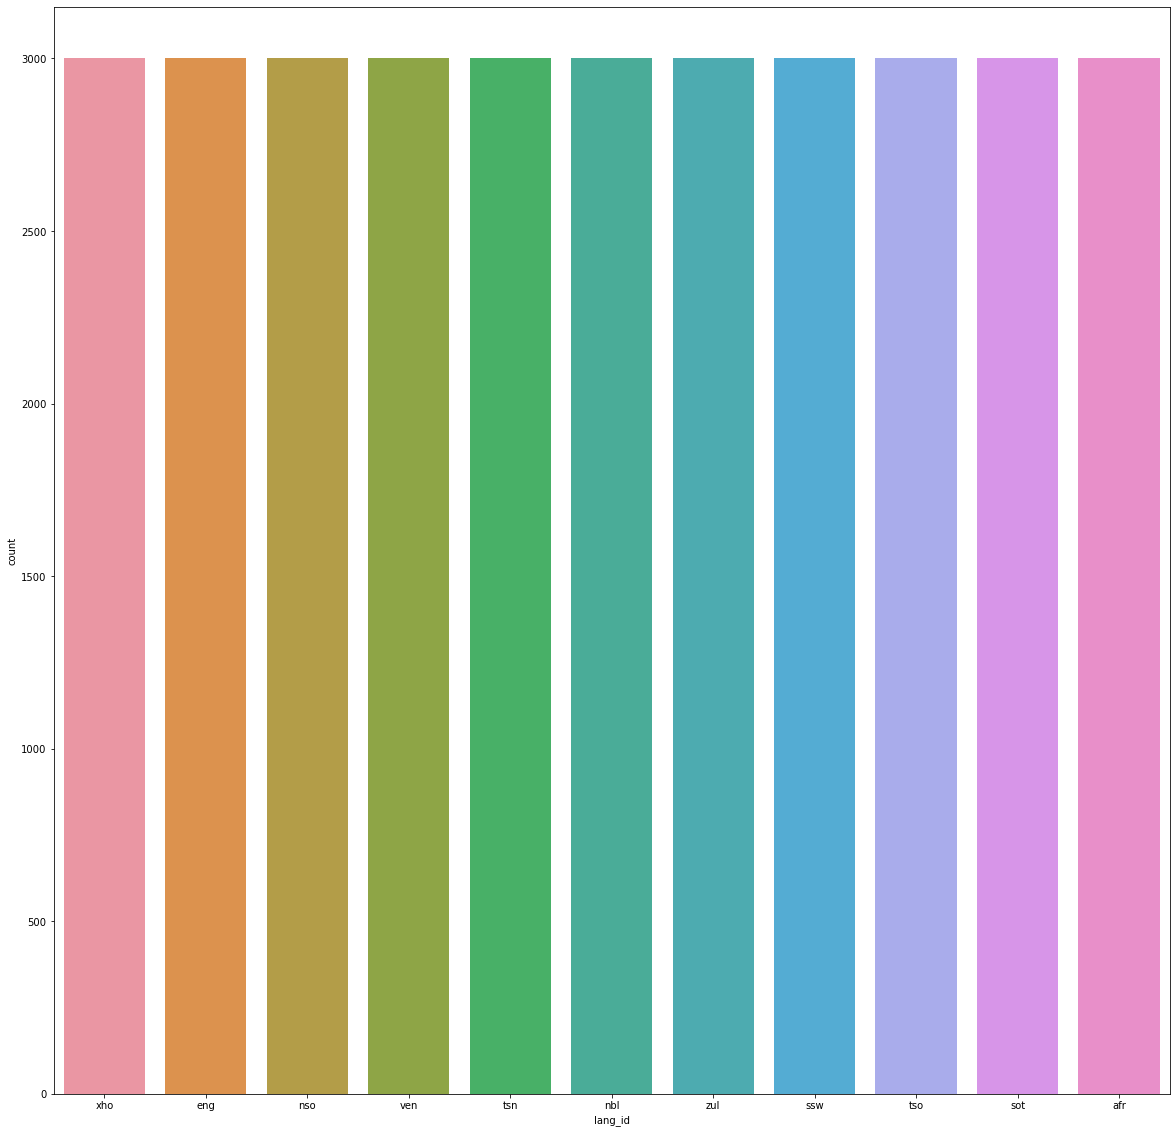

In [9]:
# Visualise the 
plt.figure (figsize =(20,20))
sns.countplot(df_train['lang_id'])

There is balanced ammount of data in all languages. This is great because if the data was unbalanced we would need to use class balancing techniques to balance the data. Unbalanced data make the model biased towards the majority class which is not good i we want a accurate model.  

### Understanding the X variable (text column) 

Now lets look at the text data first  we look at how the text looks like in the first and last row. Then we 

In [10]:
# check out the first message 
df_train['text'][0]

'umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'

In [11]:
# check out the second message 
df_train['text'][1]

'i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo'

In [12]:
# check out the second message 
df_train['text'][32999]

'mafapha a mang le ona a lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisi-kakaretso wa lefapha'

In [13]:
# for the table to show all the text in the text column 
pd.set_option('max_colwidth',-1) 

<ipython-input-13-9204d7d45b45>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth',-1)


In [14]:
# check the first five rows
df_train.head()

lang_id  \
0  xho      
1  xho      
2  eng      
3  nso      
4  ven      

                                                                                                                                                                                                                                                                       text  
0  umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika                                              
1  i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo              
2  the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months  
3  o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj                                                 
4  khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso

In [15]:
# check the last five rows
df_train.tail()

lang_id  \
32995  tsn      
32996  sot      
32997  eng      
32998  xho      
32999  sot      

                                                                                                                                                                                                                                                                                                             text  
32995  popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham                            
32996  modise mosadi na o ntse o sa utlwe hore thabang o rata ho iketsa sengangele jwang hona jwale ke mona o se a bolela ka moo a batlang ho lokollelwa ngwana wa hae ka teng wena jwale o batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore a mathakake le banana ba motse oo kaofela  
32997  closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the above address                                                                              
32998  nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa                                                                        
32999  mafapha a mang le ona a lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisi-kakaretso wa lefapha

The data has no quotataion marks, unicode, https. It only has stop words like the, of etc. Those can be removed to make the machine laerning model perform better. 

### Wordcloud 

In [16]:
# segregating dataframe for analyzing individual sentiments
afrikaans = df_train[(df_train['lang_id']=='afr')]
english = df_train[(df_train['lang_id']=='eng')]
ndebele = df_train[(df_train['lang_id']=='nbl')]
sepedi = df_train[(df_train['lang_id']=='nso')]
sesotho = df_train[(df_train['lang_id']=='sot')]
siSwati =  df_train[(df_train['lang_id']=='ssw')]
setswana = df_train[(df_train['lang_id']=='tsn')]
xitsonga = df_train[(df_train['lang_id']=='tso')]
Venda = df_train[(df_train['lang_id']=='ven')]
xhosa = df_train[(df_train['lang_id']=='xho')]
zulu = df_train[(df_train['lang_id']=='zul')]


Now that we have our segregated class we create a wordcloud to view the most prominent words in each language section  

Text(0.5, 1.0, 'Word cloud for Afrikaans language')

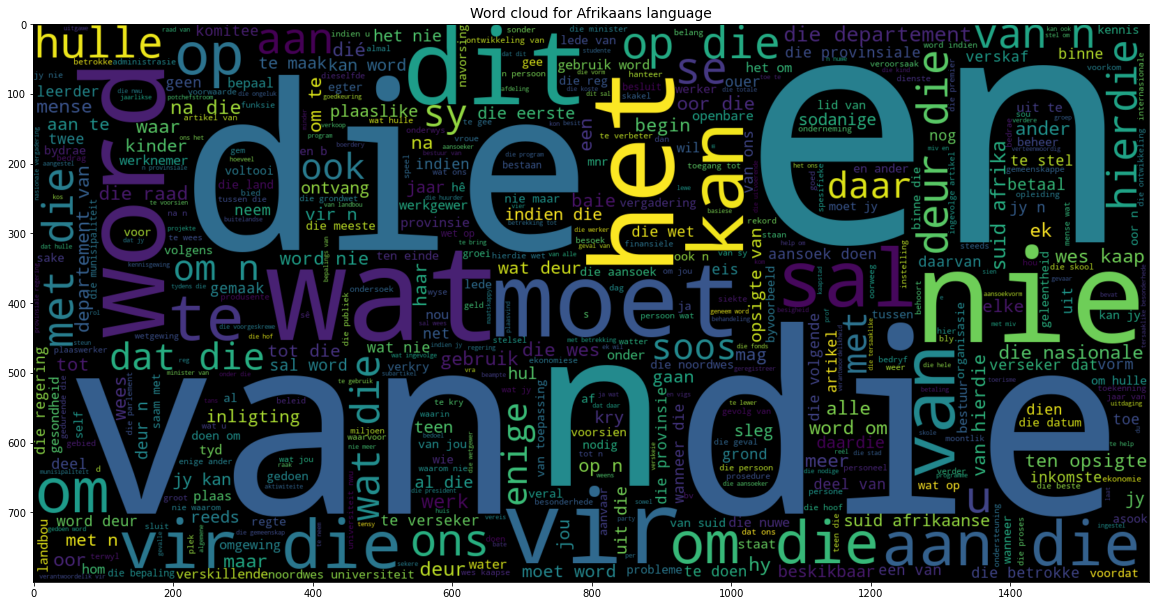

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(afrikaans.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Afrikaans language',fontsize=14)

The most prominent words in afrikaans are die, van, het, nie 

Text(0.5, 1.0, 'Word cloud for English language')

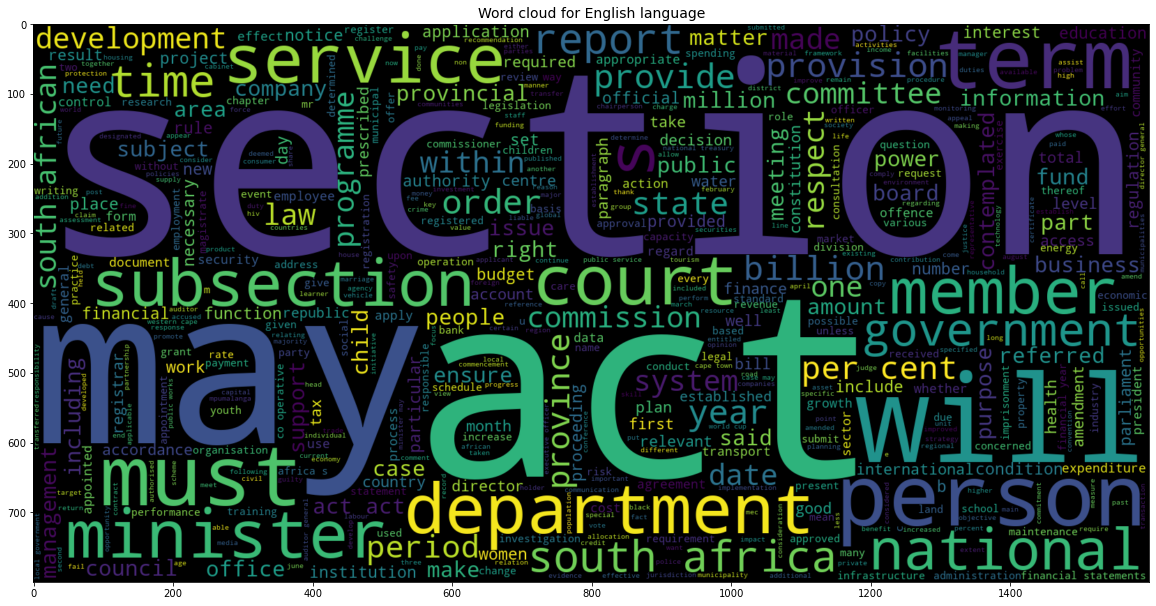

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(english.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for English language',fontsize=14)

The most prominent words in English are act, section,will, person. It seems like most English words are from law language. 

Text(0.5, 1.0, 'Word cloud for ndebele languange ')

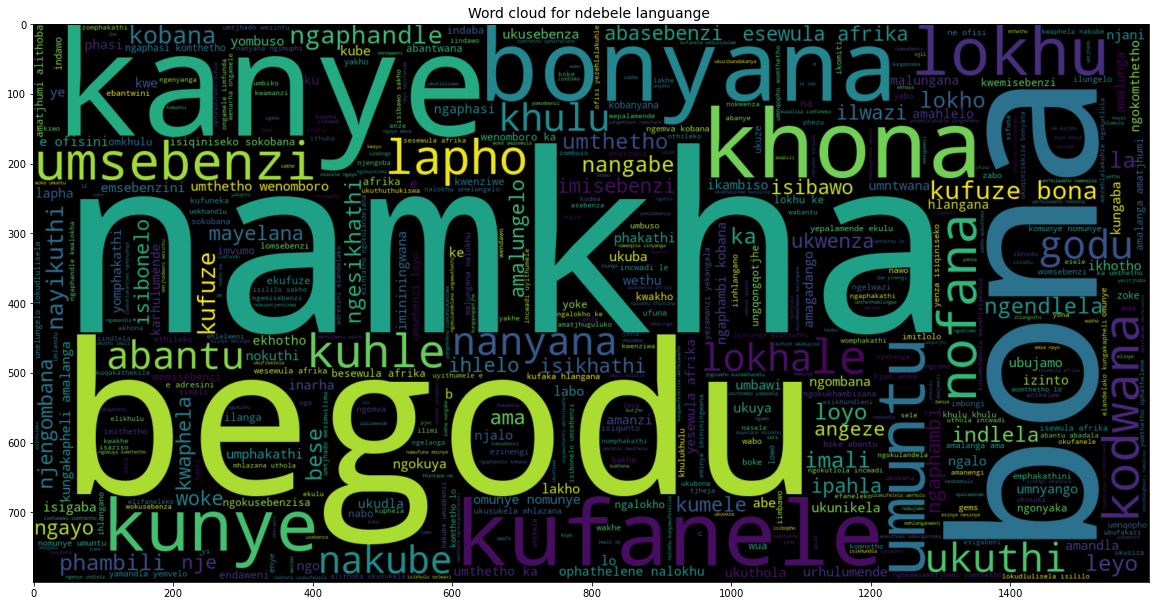

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(ndebele.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for ndebele languange ',fontsize=14)

The most prevalant words in ndebele are bona, khona, namkha, banyana, kanye, lokhu. 

Text(0.5, 1.0, 'Word cloud for sepedi languange ')

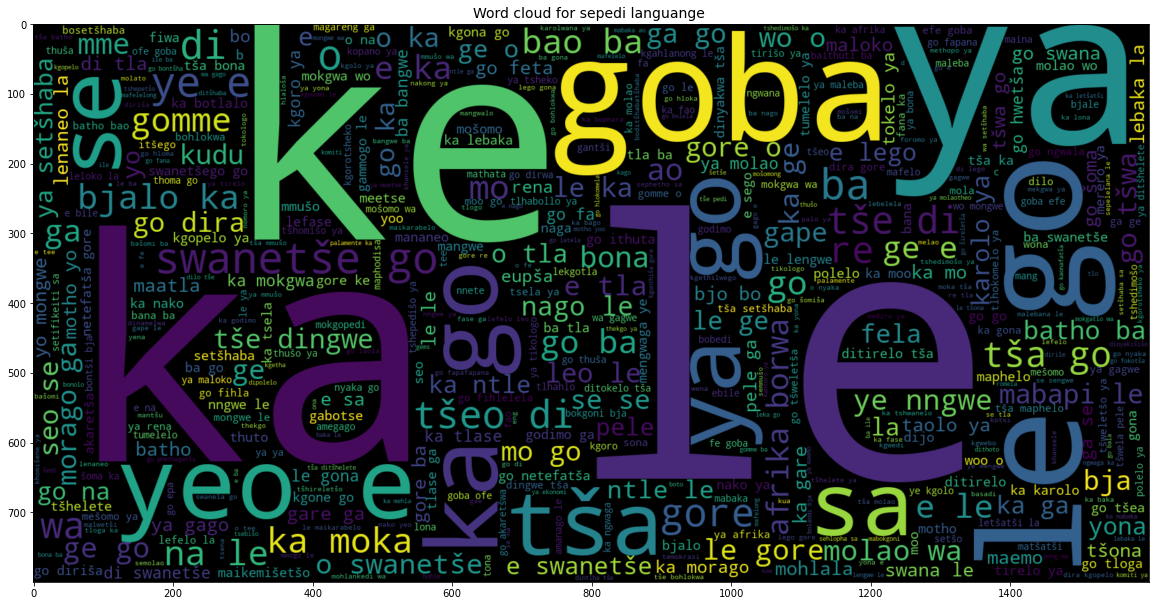

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(sepedi.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for sepedi languange ',fontsize=14)

In sepedi mostly two letter words such as ka, le , ya are prevalent. 

Text(0.5, 1.0, 'Word cloud for sesotho languange ')

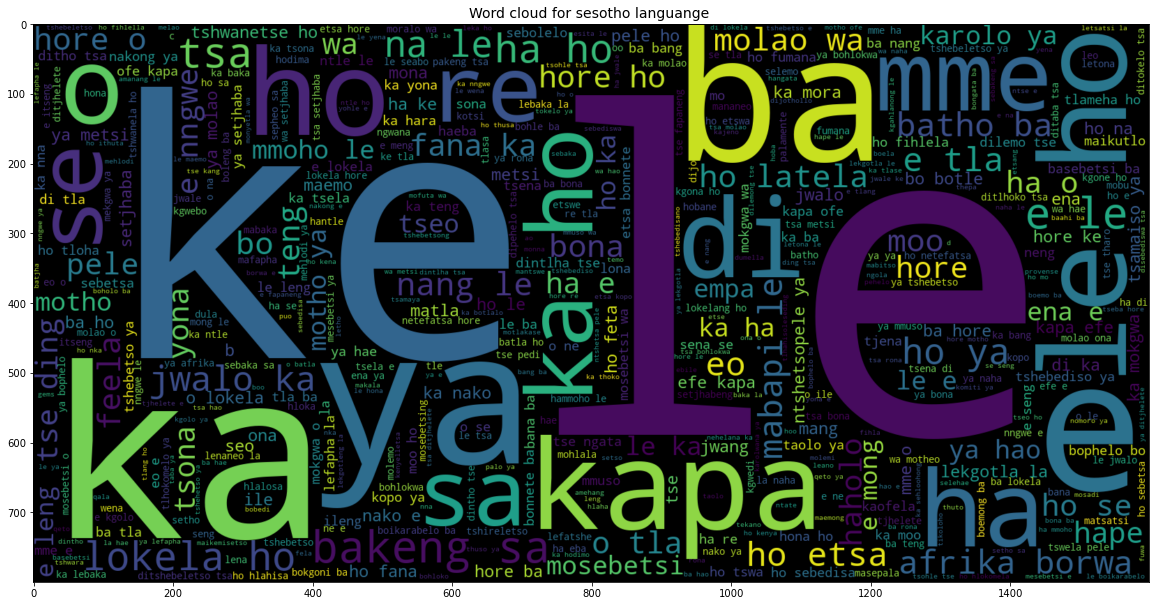

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(sesotho.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for sesotho languange ',fontsize=14)

In Sesotho two words are also most prevalent. Words like ke, la, ba are most frequently used. 

Text(0.5, 1.0, 'Word cloud for siSwati languange ')

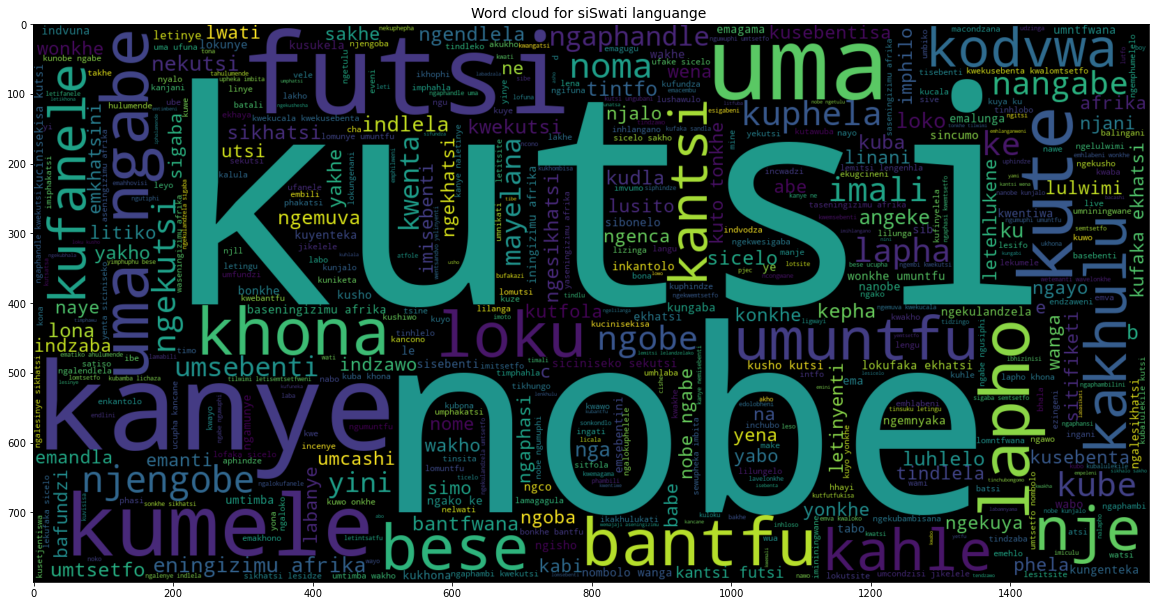

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(siSwati.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for siSwati languange ',fontsize=14)

In Siswati  kutsi, nobe,futsi and kanye (which was found in ndebele)is also prevelent 

Text(0.5, 1.0, 'Word cloud for setswana languange ')

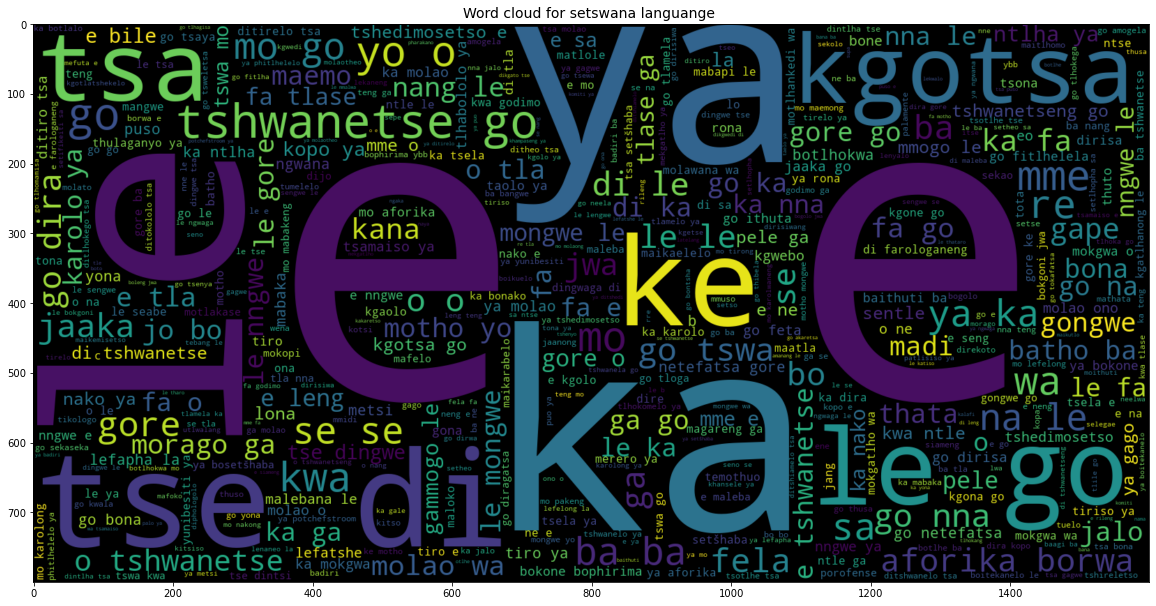

In [23]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(setswana.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for setswana languange ',fontsize=14)

In [24]:
In  Setwana e, which is a letter seems most frequent accompanied by two letter words

SyntaxError: invalid syntax (<ipython-input-24-f816c58950d7>, line 1)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(xitsonga.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for xitsonga languange ',fontsize=14)

In Xhitsonga two words are most prevalent with words like hi, ku, eka most frequently used. 

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(Venda.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Venda languange ',fontsize=14)

In [ ]:
In Venda two words are most prevalent with words like na, nga, ekha most frequently used. 

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(xhosa.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for xhosa languange ',fontsize=14)

In [ ]:
In xhosa has longer words prevalent like ukhuba, okanye and kufuneka. 

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(zulu.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for zulu languange ',fontsize=14)

In Zulu similarly to xhosa words longer than two letter are most frequently use. The word Khanye is also important in this section

##### Conclusion 
From the EDA i discoverd that the data is clean. There is not much processing to be done in the next phase. 


#  Data Engineering

In this section data will be manipulated for it to be used in data modeling. 

In [ ]:
#install stopwords with more languages 
#!pip install stopwordsiso

In [ ]:
# import re
# import nltk
# import string
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# def text_preproc(x):
#      #2. Make a space
#     x = re.sub('[^a-zA-Z]', ' ', x)
#     # remove stopword
#     #stop = stopwords.words()
#     #x = ''.join ([w for w in x if not w in stop])
#     # remove punctuation
#     x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
#     return x

In [ ]:
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('wordnet')
# from bs4 import BeautifulSoup
# import re
# import string

# porter = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

In [ ]:
# df_train['text_cleaned']= df_train.text.apply(text_preproc)

In [ ]:
# df_train.tail()

In [ ]:
# dft = df_test

In [ ]:
# dft["text_cleaned"]= dft.text.apply(text_preproc)

In [ ]:
# dft.head()

This preprocessing method proved to make the model score bad on kaggle therfore it was ommited. 

#### Lable encoding the Y variable 

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# lang = le.fit_transform(df_train['lang_id'])

In [ ]:
#lang

In [ ]:
#len(lang)

Label encoding the y_variable is giving me a zero score on kaggle therefore I ommit this part

##### Conclusion 
Efforts made to preprocess the data made it perform worse. Despite the data having stopwords, applying stopwords to cleaning imputed sone text in other languages which was not beneficial for the model. Label encoding also proved to not give better results therefore it was omited. 

#  Modeling 

In [ ]:
In this section three models will tested againist the data. Text will be vectorised and used. 

#### Feature selection 
clasify model into train data and test data. 

In [ ]:
x_value = df_train['text']
y = df_train['lang_id']

In [ ]:
X_tfeat = df_test['text']

In [ ]:
#Train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_value, y,stratify=y,test_size=0.2, random_state=0)

### Bag of words 

A bag-of-words is a representation of text that describes the occurrence of words within a document . It is important to use a bag of words to vectorise the text data sothat it can be passed throgh machine learning model. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

count_test_real = count_vectorizer.transform(X_tfeat)


### Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This tool is a good visualisation of where the machine was correct and incorect. 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##  Logistics regression machine learning model 

In [ ]:
# train  and test the logistic regression model on 80% data (train) and 20 percent test 
lm = LogisticRegression(multi_class='ovr',solver='lbfgs', max_iter=1000)
lm.fit(count_train,y_train)
pred_lm= lm.predict(count_test)
score = metrics.accuracy_score(y_test, pred_lm)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_lm, labels=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'])
plot_confusion_matrix(cm, classes=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'])

In [ ]:
#test the Logistic regression on test data 
lm.fit(count_train,y_train)
pred_logistics = lm.predict(count_test_real)


In [ ]:
from sklearn.metrics import log_loss
# Evaluate the model on the test set
f1score = f1_score(y_test, lm.predict(count_test), average ='weighted')
precision = precision_score(y_test, lm.predict(count_test), average ='weighted')
recall = recall_score(y_test, lm.predict(count_test), average ='weighted')
y_hat = lm.predict_proba(count_test)
logist_loss = log_loss(y_test, y_hat)
print("f1score : {}".format(f1score))
print("precission : {}".format(precision))
print("recall : {}".format(recall))
print("log loss error : {}".format(log_loss(y_test, y_hat)))

In [ ]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_file = df_test[['index']]
kaggle_file['lang_id'] = pred_logistics
kaggle_file.to_csv('logistics.csv', index = None)


Despite the improvements the logistic regression model perfomed on average 0.7 on kaggle therefore the next model was used and tested. 

## Multinomial  Naive Bayes machine learning model 

In [ ]:
# train  and test the Multinomial Naive Bayes  model on 80% data (train) and 20 percent test 
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'])
plot_confusion_matrix(cm, classes=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'])

In [ ]:
#test the Multinomial Naive Bayes model on test data 
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred_mnb = mnb.predict(count_test_real)

In [ ]:
from sklearn.metrics import log_loss
# Evaluate the model on the test set
f1score = f1_score(y_test, mnb.predict(count_test), average ='weighted')
precision = precision_score(y_test, mnb.predict(count_test), average ='weighted')
recall = recall_score(y_test, mnb.predict(count_test), average ='weighted')
y_hat1 = mnb.predict_proba(count_test)
naive_loss = log_loss(y_test, y_hat1)
print("f1score : {}".format(f1score))
print("precission : {}".format(precision))
print("recall : {}".format(recall))
print("log loss error : {}".format(log_loss(y_test, y_hat)))

In [ ]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_mnb = df_test[['index']]
kaggle_mnb['lang_id']= pred_mnb
kaggle_mnb.to_csv('mnb5.csv', index = None)

## Random Forest machine learning model 

In [ ]:
# train  and test the Random forest  model on 80% data (train) and 20 percent test 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=0)
clf.fit(count_train, y_train)
clf_pred= clf.predict(count_test)
score = metrics.accuracy_score(y_test, clf_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, clf_pred, labels=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'])
plot_confusion_matrix(cm, classes=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'])


In [ ]:
#test the Random forest on test data 
clf.fit(count_train, y_train)
clf_pred1= clf.predict(count_test_real)

In [ ]:
from sklearn.metrics import log_loss
# Evaluate the model on the test set
f1score = f1_score(y_test, clf.predict(count_test), average ='weighted')
precision = precision_score(y_test, clf.predict(count_test), average ='weighted')
recall = recall_score(y_test, clf.predict(count_test), average ='weighted')
y_hat2 = clf.predict_proba(count_test)
random_loss = log_loss(y_test, y_hat2)
print("f1score : {}".format(f1score))
print("precission : {}".format(precision))
print("recall : {}".format(recall))
print("log loss error : {}".format(log_loss(y_test, y_hat)))

In [ ]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_mnb = df_test[['index']]
kaggle_mnb['lang_id']= clf_pred1
kaggle_mnb.to_csv('random.csv', index = None)

## Model selection 

Log Loss is the most important classification metric based on probabilities.It's hard to interpret raw log-loss values, but log-loss is still a good metric for comparing models. For any given problem, a lower log-loss value means better predictions. We will apply log_loss to these models to choose the best model. 

In [ ]:
from sklearn.metrics import log_loss
log_loss = {'models': ['Logistic_Regression', 'Random_Forest','Naive Bayes'],
              'log_loss': [logist_loss, random_loss, naive_loss]}
loss = pd.DataFrame(log_loss).set_index('models').sort_values(by = 'log_loss')
loss.plot(kind = 'bar')

From the above graph we can see that the Multinomial Naive Bayes model has the least log loass and therefore is most efective. The Naive bayes model also has the best F1 score.  